In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def mse_loss(W, X, y):
    y_predict = W.T @ X
    return np.sum((y-y_predict)**2) / len(X)

In [3]:
def mse_log_loss(W, X, y):
    y_predict = sigmoid(W.T @ X)
    return np.sum((y-y_predict)**2) / len(X)

In [4]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [7]:
N = 100
X_train = np.concatenate((np.random.normal(1, 3, size = N), np.random.normal(-1, 3, size = N)), axis = 0)
X_train = np.vstack((X_train,np.ones(len(X_train))))
y_train = np.concatenate((np.ones(N), -np.ones(N)), axis = 0)

X, Y = np.meshgrid(np.linspace(-25, 25, 100), np.linspace(-25, 25, 100))

MSE_LOSS = np.zeros((len(X), len(Y)))
MSE_LOG_LOSS = np.zeros((len(X), len(Y)))
for i in range(len(X)):
    for j in range(len(Y)):
        W = np.array([X[i][j], Y[i][j]])
        MSE_LOSS[i][j] = mse_loss(W, X_train, y_train)
        MSE_LOG_LOSS[i][j] = mse_log_loss(W, X_train, y_train)

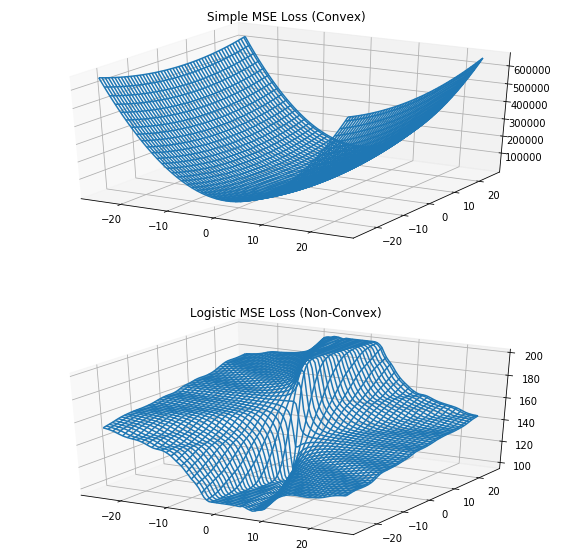

In [8]:
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(211, projection = "3d")
ax2 = fig.add_subplot(212, projection = "3d")

ax1.plot_wireframe(X, Y, MSE_LOSS)
ax1.set_title("Simple MSE Loss (Convex)")
ax2.plot_wireframe(X, Y, MSE_LOG_LOSS)
ax2.set_title("Logistic MSE Loss (Non-Convex)")
plt.show()